## step 1. Download data

In [1]:
import struct
import numpy as np

def read_idx(filename):
    """Credit: https://gist.github.com/tylerneylon"""
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [3]:
PATH_DATA = '../../../../data_for_computer_vision/datasets/fashion/'

x_train = read_idx(PATH_DATA+"train-images-idx3-ubyte")
y_train = read_idx(PATH_DATA+"train-labels-idx1-ubyte")
x_test = read_idx(PATH_DATA+"t10k-images-idx3-ubyte")
y_test = read_idx(PATH_DATA+"t10k-labels-idx1-ubyte")

In [8]:
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


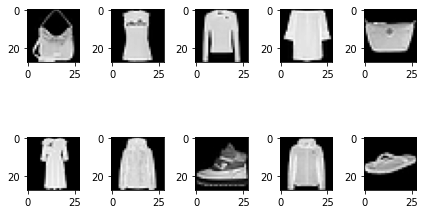

In [7]:
# let's view some image 
import matplotlib.pyplot as plt
%matplotlib inline

rows = 2
cols = 5
fig,ax = plt.subplots(rows,cols)

for i in range(rows):
    for j in range(cols):
        random_number = np.random.randint(0,len(x_train))
        ax[i][j].imshow(x_train[random_number],cmap='gray')
        
plt.tight_layout()

## step 2. Prepare our datasets

In [11]:
from keras.utils import to_categorical

img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]
input_shape = (img_rows,img_cols,1)

x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = to_categorical(y_train)
y_test =to_categorical(y_test)

## step 3. Create our model

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Dropout,BatchNormalization,Flatten

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',
                input_shape=input_shape))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1],activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_3 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)             

In [16]:
model.compile(loss='categorical_crossentropy',
             metrics=['accuracy'],
             optimizer='adam')

## step 3. training model

In [17]:
batch_size = 128
epochs = 4

history = model.fit(x_train,y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   validation_data=(x_test,y_test))

score = model.evaluate(x_test,y_test)
print('test loss  = %f and test accuracyy = %f'%(score[0],score[1]))

Epoch 1/4
469/469 [==============================] - 7s 15ms/step - loss: 0.4346 - accuracy: 0.8490 - val_loss: 4.6712 - val_accuracy: 0.1709
Epoch 2/4
469/469 [==============================] - 7s 14ms/step - loss: 0.2784 - accuracy: 0.9019 - val_loss: 0.2753 - val_accuracy: 0.8997
Epoch 3/4
469/469 [==============================] - 7s 14ms/step - loss: 0.2343 - accuracy: 0.9159 - val_loss: 0.2579 - val_accuracy: 0.9091
Epoch 4/4
313/313 [==============================] - 1s 3ms/step - loss: 0.2254 - accuracy: 0.9195
test loss  = 0.225393 and test accuracyy = 0.919500


Text(0.5, 1.0, 'Loss After Training 4 epochs')

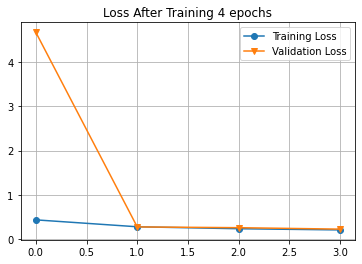

In [18]:
import matplotlib.pyplot as plt

hist_dict = history.history

loss_values = hist_dict['loss']
val_loss_values = hist_dict['val_loss']

plt.plot(range(len(loss_values)),loss_values,marker='o',label='Training Loss')
plt.plot(range(len(loss_values)),val_loss_values,marker='v',label='Validation Loss')
plt.grid()
plt.legend()
plt.title('Loss After Training 4 epochs')

Text(0.5, 1.0, 'accuracy After Training 4 epochs')

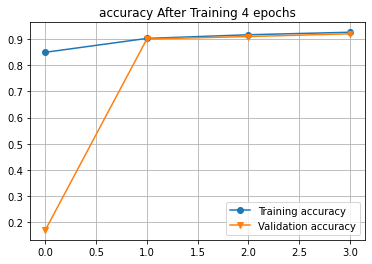

In [19]:
acc_values = hist_dict['accuracy']
val_acc_values = hist_dict['val_accuracy']

plt.plot(range(len(loss_values)),acc_values,marker='o',label='Training accuracy')
plt.plot(range(len(loss_values)),val_acc_values,marker='v',label='Validation accuracy')
plt.grid()
plt.legend()
plt.title('accuracy After Training 4 epochs')

### Check performance with heatmap

In [41]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [42]:
y_test_check = np.argmax(y_test,axis=1)
y_test_check

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [44]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_check,pred))

[[871   0  12  16   2   2  94   0   3   0]
 [  1 970   0  19   2   0   6   0   2   0]
 [ 20   1 857  12  36   0  74   0   0   0]
 [ 13   1   5 952  10   0  19   0   0   0]
 [  1   0  43  34 841   0  81   0   0   0]
 [  0   0   0   0   0 993   0   5   0   2]
 [ 73   0  39  30  39   0 813   0   6   0]
 [  0   0   0   0   0  11   0 982   0   7]
 [  2   0   2   5   1   3   5   1 981   0]
 [  0   0   0   0   0  10   0  55   0 935]]


([<matplotlib.axis.XTick at 0x2407f4f0190>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

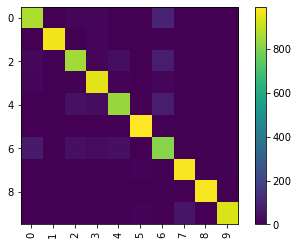

In [51]:
label = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
plt.imshow(confusion_matrix(y_test_check,pred))
plt.colorbar()
plt.yticks(np)
plt.xticks(np.arange(10),label,rotation=90)

## step 4. test with some image

In [20]:
import cv2

In [31]:
def getLabel(idx_class):
    if idx_class == 0:
        return "T-shirt/top"
    elif idx_class == 1:
        return "Trouser"
    elif idx_class == 2:
        return "Pullover"
    elif idx_class == 3:
        return "Dress"
    elif idx_class == 4:
        return "Coat"
    elif idx_class == 5:
        return "Sandal"
    elif idx_class == 6:
        return "Shirt"
    elif idx_class == 7:
        return "Sneaker"
    elif idx_class == 8:
        return "Bag"
    elif idx_class == 9:
        return "Ankle Boot"
    

def draw_test(name,pred,actual,input_im):
    res = getLabel(pred)
    actual = getLabel(actual)
    input_im =cv2.cvtColor(input_im,cv2.COLOR_GRAY2BGR)
    
    expand_image= cv2.copyMakeBorder(input_im,0,0,0,4*imageL.shape[0],cv2.BORDER_CONSTANT,value=(0,0,0))
    cv2.putText(expand_image,'predicted-'+str(res),(152,70),cv2.FONT_HERSHEY_COMPLEX,
               1,(0,255,0),1)
    cv2.putText(expand_image,'actual-'+str(actual),(152,100),cv2.FONT_HERSHEY_COMPLEX,
               1,(0,0,255),1)
    cv2.imshow(name,expand_image)
    
    

In [32]:

num_test_img = 10

for i in range(num_test_img):
    random_number = np.random.randint(0,len(x_test))
    input_im = x_test[random_number]
    actual = y_test[random_number].argmax(axis=0) # find index of 1 value
    imageL = cv2.resize(input_im,None,fx=4,fy=4,interpolation=cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1)
    
    res = np.argmax(model.predict(input_im,1,verbose=0)[0])
    draw_test('prediction',res,actual,imageL)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()